ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [92]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)
**1: Calculate Median and IQR**

Sorted data: [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

**Median:** The middle value is between the 5th and 6th numbers = (33 + 33) / 2 = 33

**IQR:**
- Q1 (25th percentile) = 32  
- Q3 (75th percentile) = 34  
- IQR = Q3 - Q1 = 34 - 32 = 2  

**2: Check if 500 is an outlier using IQR rule**

- Lower fence = Q1 - 1.5 × IQR = 32 - 1.5 × 2 = 32 - 3 = 29  
- Upper fence = Q3 + 1.5 × IQR = 34 + 1.5 × 2 = 34 + 3 = 37  

Since 500 > 37 (upper fence), 500 is an outlier.

**3: Why Median and IQR are better**

Median and IQR are better than mean and standard deviation for this data because the big value 500 pulls the mean up a lot, so the mean does not show normal spending. The median is not changed much by extreme values, and the IQR only looks at the middle 50% of the data and ignores outliers. Together, they give a clearer and more honest picture of normal customer spending.


In [93]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
median_q1 = np.median(data_q1)
iqr_q1 = np.percentile(data_q1, 75) - np.percentile(data_q1, 25)
lower_bound_q1 = np.percentile(data_q1, 25) - 1.5 * iqr_q1
upper_bound_q1 = np.percentile(data_q1, 75) + 1.5 * iqr_q1
outliers_q1 = [x for x in data_q1 if x < lower_bound_q1 or x > upper_bound_q1]
print(f"Q1 Outliers: {outliers_q1}")

Q1 Outliers: [500]


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student):

**1: Computing PPV**

Given:
- P(Disease) = 0.01
- Sensitivity: P(Positive | Disease) = 0.90
- Specificity: P(Negative | No Disease) = 0.92
- Therefore: P(Positive | No Disease) = 1 - 0.92 = 0.08

**Using Bayes' Theorem:**

$$\text{PPV} = P(\text{Disease | Positive}) = \frac{P(\text{Positive | Disease}) \times P(\text{Disease})}{P(\text{Positive})}$$

**P(Positive):**

$$P(\text{Positive}) = P(\text{Positive | Disease}) \times P(\text{Disease}) + P(\text{Positive | No Disease}) \times P(\text{No Disease})$$

$$P(\text{Positive}) = (0.90 \times 0.01) + (0.08 \times 0.99)$$

$$P(\text{Positive}) = 0.009 + 0.0792 = 0.0882$$

**PPV:**

$$\text{PPV} = \frac{0.90 \times 0.01}{0.0882} = \frac{0.009}{0.0882} = 0.102$$

**PPV = 10.2%**


**2: Effect of increasing prevalence to 20%**

If more people have the disease (prevalence 20%), the PPV will become higher. This is because a positive test is now more likely to come from someone who really has the disease. The number of true positives grows faster than the number of false positives. So a positive result is more reliable when the disease is more common in the population.


### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

**1. Type of ML Task:**  
This is a **binary classification** task, as the target variable `premium_user` indicates whether a user is a premium user (1) or not (0).

**2. Preprocessing Steps:**  
- Handle missing values in `age` and `daily_clicks`.  
- One-hot encode the `region` categorical variable.  
- Scale `age` and `daily_clicks`.  
- Split the data into training and test sets.

**3. ML Pipeline (Main Steps):**  
- Load and inspect the raw data for structure, types, and basic stats.  
- Clean the data by imputing missing values in numeric features.  
- One-hot encode `region` and scale numeric columns.  
- Split the processed data into train and test sets.  
- Train a suitable classifier (e.g., logistic regression or decision tree).  
- Evaluate using accuracy, precision, recall, and F1-score on the test set.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [94]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

### Step 1: EDA - Missing Values and Unique Counts

First, I will check how many missing values are in each column and count unique values.

In [95]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(df.nunique())

Missing Values:
age             2
region          0
purchases       1
premium_user    0
dtype: int64

Unique Values:
age             5
region          4
purchases       6
premium_user    2
dtype: int64


### Step 2: Correlation Matrix

Next, I will check the correlation between numeric columns.

In [96]:
# Correlation between numeric columns
print("Correlation Matrix:")
print(df[['age', 'purchases', 'premium_user']].corr())

Correlation Matrix:
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


### Step 3: Plots

I will create a histogram for purchases and a bar chart for region frequency.

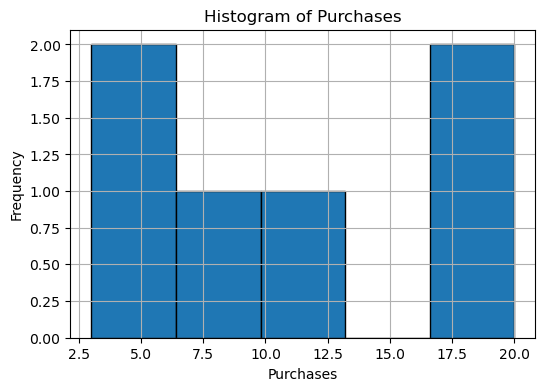

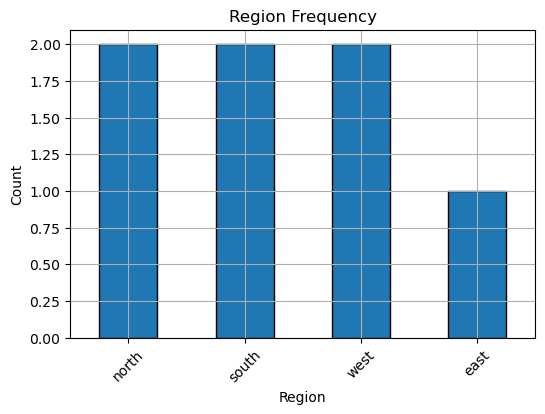

In [97]:
# Histogram of purchases
plt.figure(figsize=(6, 4))
plt.hist(df['purchases'].dropna(), bins=5, edgecolor='black')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.title('Histogram of Purchases')
plt.show()

# Bar chart for region
plt.figure(figsize=(6, 4))
df['region'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Frequency')
plt.xticks(rotation=45)
plt.show()

### Step 4: Preprocessing - Imputation

I will fill the missing values. For age, I use median. For purchases, I use mean.

In [98]:
# copy of the dataframe
df_processed = df.copy()

# Impute age with median
age_imputer = SimpleImputer(strategy='median')
df_processed['age'] = age_imputer.fit_transform(df_processed[['age']])

# Impute purchases with mean
purchases_imputer = SimpleImputer(strategy='mean')
df_processed['purchases'] = purchases_imputer.fit_transform(df_processed[['purchases']])

print("After imputation:")
print(df_processed)

After imputation:
    age region  purchases  premium_user
0  25.0  north   3.000000             0
1  30.0  south  10.000000             1
2  30.0  north   5.000000             0
3  22.0   east  10.833333             0
4  45.0   west  20.000000             1
5  52.0   west  18.000000             1
6  30.0  south   9.000000             0


### Step 5: One-Hot Encoding

I will convert the region column into numbers using one-hot encoding.

In [99]:
# One-hot encode region
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

print("After one-hot encoding:")
print(df_processed)

After one-hot encoding:
    age  purchases  premium_user  region_north  region_south  region_west
0  25.0   3.000000             0          True         False        False
1  30.0  10.000000             1         False          True        False
2  30.0   5.000000             0          True         False        False
3  22.0  10.833333             0         False         False        False
4  45.0  20.000000             1         False         False         True
5  52.0  18.000000             1         False         False         True
6  30.0   9.000000             0         False          True        False


### Step 6: Feature Engineering

I will create a new feature called `high_spender`. If purchases are more than 10, they are a high spender.

In [100]:
# Create high_spender feature
df_processed['high_spender'] = (df_processed['purchases'] > 10).astype(int)

print("After creating new feature:")
print(df_processed)

After creating new feature:
    age  purchases  premium_user  region_north  region_south  region_west  \
0  25.0   3.000000             0          True         False        False   
1  30.0  10.000000             1         False          True        False   
2  30.0   5.000000             0          True         False        False   
3  22.0  10.833333             0         False         False        False   
4  45.0  20.000000             1         False         False         True   
5  52.0  18.000000             1         False         False         True   
6  30.0   9.000000             0         False          True        False   

   high_spender  
0             0  
1             0  
2             0  
3             1  
4             1  
5             1  
6             0  


### Step 7: Scaling

I will scale the numeric columns using RobustScaler. This makes all numbers in a similar range.

In [101]:
# Scale numeric columns
scaler = RobustScaler()
numeric_cols = ['age', 'purchases']
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

print("Final transformed dataframe:")
print(df_processed)

Final transformed dataframe:
   age  purchases  premium_user  region_north  region_south  region_west  \
0 -0.5  -0.943820             0          True         False        False   
1  0.0   0.000000             1         False          True        False   
2  0.0  -0.674157             0          True         False        False   
3 -0.8   0.112360             0         False         False        False   
4  1.5   1.348315             1         False         False         True   
5  2.2   1.078652             1         False         False         True   
6  0.0  -0.134831             0         False          True        False   

   high_spender  
0             0  
1             0  
2             0  
3             1  
4             1  
5             1  
6             0  


**Explanation:**

I completed the EDA by checking missing values, unique values, and correlation. I made two plots to see the data better way. Then I cleaned the data by filling missing values, converting region to numbers, and scaling the numeric columns. Finally, I created a new feature called `high_spender` to help the model learn better.

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [102]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

### Step 2: Train-Test Split

I will split the data into training set (80%) and test set (20%).

In [103]:
# Separate features and target
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 4
Test samples: 2


### Step 3: Train Linear Regression Model

I will train a linear regression model to predict house price.

In [104]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


### Step 4: Model Coefficients and Predictions

I will check the intercept and coefficients, then make predictions on test data.

In [105]:
# Print intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"area_sqft coefficient: {model.coef_[0]}")
print(f"bedrooms coefficient: {model.coef_[1]}")

# Make predictions on test set
y_pred = model.predict(X_test)

print(f"\nTest set predictions:")
print(f"Actual prices: {y_test.values}")
print(f"Predicted prices: {y_pred}")

Intercept: -33.846153846153754
Coefficients: [0.15384615 5.38461538]
area_sqft coefficient: 0.15384615384615377
bedrooms coefficient: 5.384615384615391

Test set predictions:
Actual prices: [120 150]
Predicted prices: [100.         130.76923077]


### Step 5: Calculate Metrics

I will calculate MAE, RMSE, and R² to see how good the model is.

In [106]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (R-squared): {r2:.4f}")

Model Performance Metrics:
MAE (Mean Absolute Error): 19.62
RMSE (Root Mean Squared Error): 19.62
R² (R-squared): -0.7107


### Step 6: Residual Plot

I will plot the residuals to see if there are any patterns. Residuals are the difference between actual and predicted values.

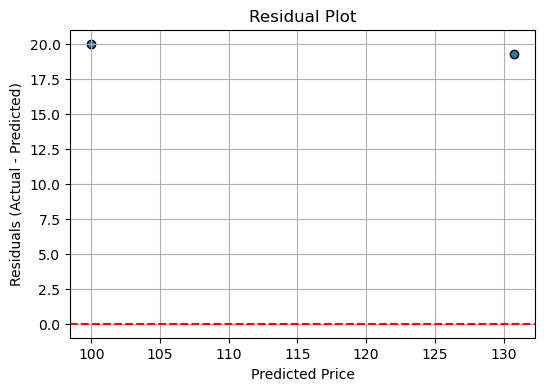

In [107]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

**Explanation:**

The residuals are scattered around the zero line. Since we have very few test samples, it is hard to see a clear pattern. The model seems to predict reasonably well, but with more data we could better understand if the model works well for all price ranges.

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [108]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

### Part 1a: Threshold 0.5 - Predictions and Metrics

I will convert probabilities to predictions using 0.5 as the cutoff.

In [109]:
# Convert probabilities to predictions with threshold 0.5
y_pred_05 = (y_prob >= 0.5).astype(int)

# Calculate metrics
cm_05 = confusion_matrix(y_true, y_pred_05)
precision_05 = precision_score(y_true, y_pred_05)
recall_05 = recall_score(y_true, y_pred_05)
f1_05 = f1_score(y_true, y_pred_05)

print("Threshold = 0.5")
print(f"Confusion Matrix:\n{cm_05}")
print(f"Precision: {precision_05:.3f}")
print(f"Recall: {recall_05:.3f}")
print(f"F1 Score: {f1_05:.3f}")

Threshold = 0.5
Confusion Matrix:
[[5 0]
 [0 5]]
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


### Part 1b: Threshold 0.3 - Predictions and Metrics

Now I will use 0.3 as the threshold. This means more predictions will be positive.

In [110]:
# Convert probabilities to predictions with threshold 0.3
y_pred_03 = (y_prob >= 0.3).astype(int)

# Calculate metrics
cm_03 = confusion_matrix(y_true, y_pred_03)
precision_03 = precision_score(y_true, y_pred_03)
recall_03 = recall_score(y_true, y_pred_03)
f1_03 = f1_score(y_true, y_pred_03)

print("Threshold = 0.3")
print(f"Confusion Matrix:\n{cm_03}")
print(f"Precision: {precision_03:.3f}")
print(f"Recall: {recall_03:.3f}")
print(f"F1 Score: {f1_03:.3f}")

Threshold = 0.3
Confusion Matrix:
[[3 2]
 [0 5]]
Precision: 0.714
Recall: 1.000
F1 Score: 0.833


### Part 1c: Explanation of Threshold Change

When I lowered the threshold from 0.5 to 0.3, recall increased because the model now predicts more samples as positive, so it catches more of the actual positive cases. However, precision decreased because with a lower threshold, the model also predicts some negative samples as positive by mistake. This is the trade-off: lower threshold means we catch more positives but also get more false alarms.

### Part 2: ROC Curve and AUC

I will plot the ROC curve and calculate the AUC score.

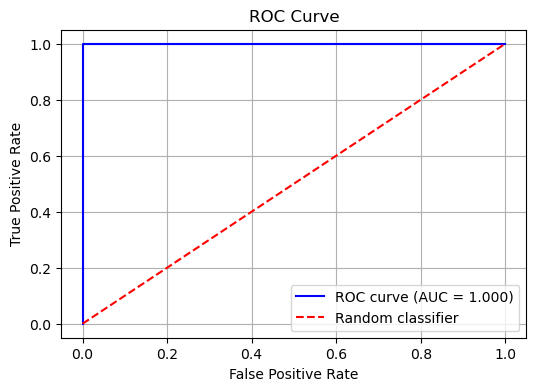

AUC Score: 1.000


In [111]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC Score: {roc_auc:.3f}")

**AUC Interpretation:**

A high AUC (close to 1.0) means the model is very good at separating positive and negative classes. A low AUC (close to 0.5) means the model is not much better than random guessing.

### Part 3: Decision Tree

I will create a small dataset and train a decision tree to predict if a student passed based on study hours.

In [112]:
# Create dataset
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

# Prepare features and target
X_tree = df3[['hours']]
y_tree = df3['passed']

# Train decision tree
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_tree, y_tree)

print("Decision tree trained successfully!")
print(f"Tree depth: {tree_model.get_depth()}")
print(f"Number of leaves: {tree_model.get_n_leaves()}")

Decision tree trained successfully!
Tree depth: 2
Number of leaves: 3


### Plot the Decision Tree

I will visualize the tree to see how it makes decisions.

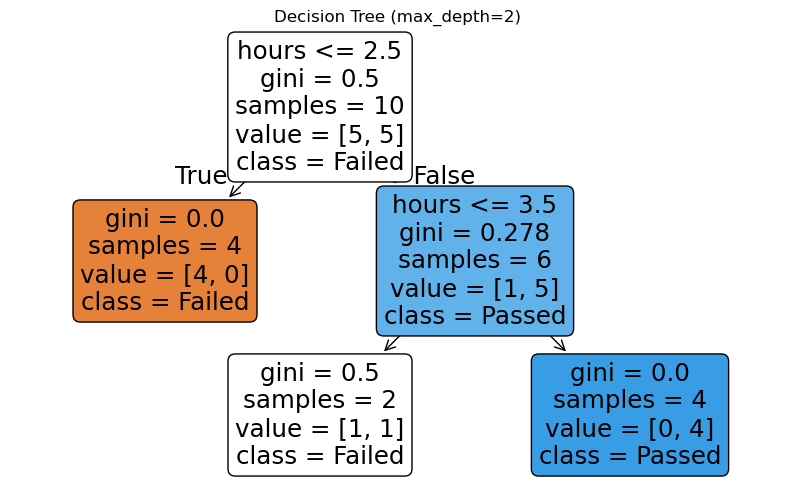

In [113]:
# Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=['hours'], class_names=['Failed', 'Passed'], 
          filled=True, rounded=True)
plt.title('Decision Tree (max_depth=2)')
plt.show()

**Overfitting or Generalization:**

The tree has a maximum depth of 2, which is quite shallow. This is good because it prevents the model from learning too much detail from the small dataset. With only 10 samples, a deeper tree would memorize the training data and not work well on new data. So this tree should generalize reasonably well.